In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import os
# sns.color_palette("pastel")

%matplotlib inline

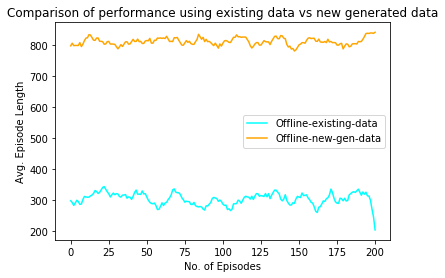

In [15]:
offline_data_path = "Offline/offline_results_using_existing_mountain_car_offline_data/"
offline_data = os.listdir(offline_data_path)

for data in offline_data:
    if("hyperparam_final_avgreturns" in data):
        offline_data_path_avg_ret = offline_data_path + data
        offline_data_avg_ret = np.load(offline_data_path_avg_ret).astype(np.float)
    elif("hyperparam_final_avgepisodes" in data):
        offline_data_path_avg_eps = offline_data_path + data
        offline_data_avg_eps = np.load(offline_data_path_avg_eps).astype(np.float)
        


new_offline_data_path = "Offline/offline_results_using_new_generated_mountain_car_offline_data/"
new_offline_data = os.listdir(new_offline_data_path)

for data in new_offline_data:
    if("hyperparam_final_avgreturns" in data):
        new_offline_data_path_avg_ret = new_offline_data_path + data
        new_offline_data_avg_ret = np.load(new_offline_data_path_avg_ret).astype(np.float)
    elif("hyperparam_final_avgepisodes" in data):
        new_offline_data_path_avg_eps = new_offline_data_path + data
        new_offline_data_avg_eps = np.load(new_offline_data_path_avg_eps).astype(np.float)
        



mavg_offline_data_avg_eps = []
w = 10
for i in range(len(offline_data_avg_eps)):
    mavg_offline_data_avg_eps.append(np.mean(offline_data_avg_eps[i:i+w]))
    
mavg_new_offline_data_avg_eps = []
w = 10
for i in range(len(offline_data_avg_eps)):
    mavg_new_offline_data_avg_eps.append(np.mean(new_offline_data_avg_eps[i:i+w]))
    
# plots
plt.plot(mavg_offline_data_avg_eps, color='cyan', label='Offline-existing-data')
plt.plot(mavg_new_offline_data_avg_eps, color='orange', label='Offline-new-gen-data')
plt.legend()
plt.title(f"Comparison of performance using existing data vs new generated data")
plt.ylabel(f"Avg. Episode Length")
plt.xlabel("No. of Episodes")
# sns.set(rc={'text.usetex': True})
plt.savefig("Comparison of performance using existing data vs new generated data.png", dpi=300)
plt.show()

In [153]:
list_of_all_experiments = [
                            "./pure_offline_with_mstde_next_state/",
                            "./pure_online_with_mstde_next_state/",
                            "./next_state_offline_online/",
                            "./pure_offline_next_reward_offline/",
                            "./pure_online_next_state_online/",
                            "./offline_online_with_next_state_in_offline_mstde_next_state_online/",
                            "./offline_online_mstde_next_state_offline_mstde_online/",
                            "./next_reward_offline_online/",
                            "./mstde_offline_online/",
                            "./pure_online_next_reward_online/",
                            "./pure_online_mstde_online/",
                            "./offline_online_next_state_in_offline_mstde_in_online/",
                            "./pure_offline_mstde_offline/",
                            "./pure_offline_next_state_offline/",
                            "./offline_online_mstde_and_next_state_in_offline_mstde_and_next_state_in_online/",
                           
                            "./pure_online_mstde_reward/",
                            "./pure_offline_mstde_reward/",
                            "./offline_online_mstde_reward_offline_mstde_reward_online/",

                            "./offline_online_mstde_reward_offline_mstde_online/",
                            "./offline_online_reward_offline_mstde_online/",
                            "./offline_online_reward_offline_mstde_reward_online/"
                          ]

In [154]:
dict_of_experiments_files = {}

for exp in list_of_all_experiments:
    dict_of_experiments_files[exp] = []
    for files in glob(exp + "*.npy"):
        if "final_avgepisodes" in files or "final_avgreturns" in files:
            dict_of_experiments_files[exp].append(files)

In [103]:
def show_plot_for_all_three_types(file_name, name_of_exp, pure_online, pure_offline, pure_offline_online):
    # read the files
    online = np.load(pure_online)
    offline = np.load(pure_offline)
    offline_online = np.load(pure_offline_online)
    
    # compute moving avg
    w = 10
    online_avg = np.array([np.mean(online[i:i+w]) for i in range(0, len(online))])
    offline_avg = np.array([np.mean(offline[i:i+w]) for i in range(0, len(offline))])
    offline_online_avg = np.array([np.mean(offline_online[i:i+w]) for i in range(0, len(offline_online))])

    # plots
    plt.plot(online_avg, color='tab:cyan', label='Pure-Online')
    plt.plot(offline_avg, color='tab:orange', label='Pure-Offline')
    plt.plot(offline_online_avg, color='tab:red', label='Offline-Online')
    plt.legend()
    plt.title(f"{file_name} for Mountain Car with {name_of_exp}")
    plt.ylabel(f"Avg. {file_name}")
    plt.xlabel("No. of Episodes")
    sns.set(rc={'text.usetex': True})
    plt.savefig(file_name + "_" + name_of_exp + ".png", dpi=300)
    plt.show()

In [104]:
# mstde + next_state
exp_name = "MSTDE + Next State"
offline_exp = list_of_all_experiments[0]
online_exp = list_of_all_experiments[1]
offline_online_exp = list_of_all_experiments[-1]

offline_files = dict_of_experiments_files[offline_exp]
online_files = dict_of_experiments_files[online_exp]
offline_online_files = dict_of_experiments_files[offline_online_exp]

offline_exp = offline_exp.replace("/", "").replace(".", "")
online_exp = online_exp.replace("/", "").replace(".", "")
offline_online_exp = offline_online_exp.replace("/", "").replace(".", "")

# avg returns
offline_returns = offline_files[1]
online_returns = online_files[0]
offline_online_returns = offline_online_files[0]

# avg episodes
offline_eps = offline_files[0]
online_eps = online_files[1]
offline_online_eps = offline_online_files[1]

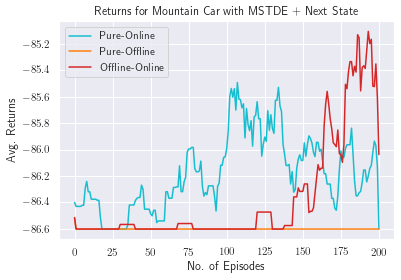

In [105]:
show_plot_for_all_three_types("Returns", exp_name, online_returns, offline_returns, offline_online_returns)

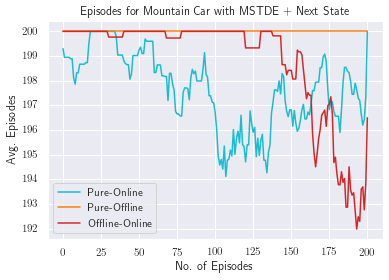

In [106]:
show_plot_for_all_three_types("Episodes", "MSTDE + Next State", online_eps, offline_eps, offline_online_eps)

In [107]:
# next_reward
exp_name = "Next Reward"
offline_exp = list_of_all_experiments[3]
online_exp = list_of_all_experiments[9]
offline_online_exp = list_of_all_experiments[7]

offline_files = dict_of_experiments_files[offline_exp]
online_files = dict_of_experiments_files[online_exp]
offline_online_files = dict_of_experiments_files[offline_online_exp]

offline_exp = offline_exp.replace("/", "").replace(".", "")
online_exp = online_exp.replace("/", "").replace(".", "")
offline_online_exp = offline_online_exp.replace("/", "").replace(".", "")

# avg returns
offline_returns = offline_files[1]
online_returns = online_files[0]
offline_online_returns = offline_online_files[0]

# avg episodes
offline_eps = offline_files[0]
online_eps = online_files[1]
offline_online_eps = offline_online_files[1]

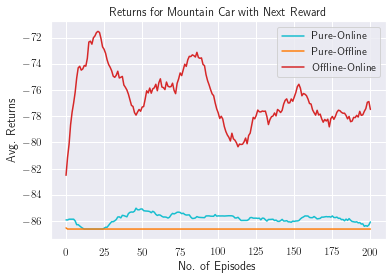

In [108]:
show_plot_for_all_three_types("Returns", exp_name, online_returns, offline_returns, offline_online_returns)

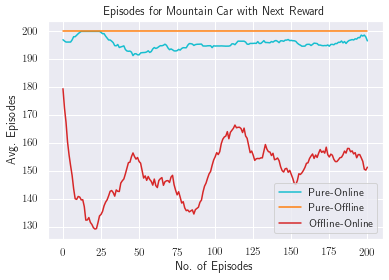

In [109]:
show_plot_for_all_three_types("Episodes", exp_name, online_eps, offline_eps, offline_online_eps)

In [152]:
# next_reward
exp_name = "Next State"
offline_exp = list_of_all_experiments[13]
online_exp = list_of_all_experiments[4]
offline_online_exp = list_of_all_experiments[2]

offline_files = dict_of_experiments_files[offline_exp]
online_files = dict_of_experiments_files[online_exp]
offline_online_files = dict_of_experiments_files[offline_online_exp]

offline_exp = offline_exp.replace("/", "").replace(".", "")
online_exp = online_exp.replace("/", "").replace(".", "")
offline_online_exp = offline_online_exp.replace("/", "").replace(".", "")

print(online_exp, online_files)

"""
# avg returns
offline_returns = offline_files[1]
online_returns = online_files[0]
offline_online_returns = offline_online_files[1]

# avg episodes
offline_eps = offline_files[0]
online_eps = online_files[1]
offline_online_eps = offline_online_files[0]
"""

pure_online_next_state_online []


'\n# avg returns\noffline_returns = offline_files[1]\nonline_returns = online_files[0]\noffline_online_returns = offline_online_files[1]\n\n# avg episodes\noffline_eps = offline_files[0]\nonline_eps = online_files[1]\noffline_online_eps = offline_online_files[0]\n'

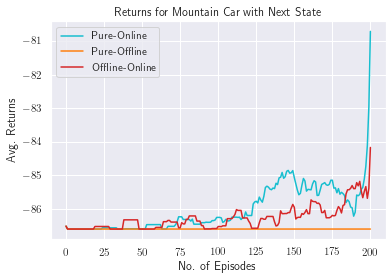

In [150]:
show_plot_for_all_three_types("Returns", exp_name, online_returns, offline_returns, offline_online_returns)

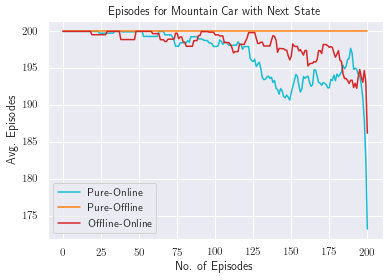

In [151]:
show_plot_for_all_three_types("Episodes", exp_name, online_eps, offline_eps, offline_online_eps)

In [113]:
# next_reward
exp_name = "MSTDE"
offline_exp = list_of_all_experiments[12]
online_exp = list_of_all_experiments[10]
offline_online_exp = list_of_all_experiments[8]

offline_files = dict_of_experiments_files[offline_exp]
online_files = dict_of_experiments_files[online_exp]
offline_online_files = dict_of_experiments_files[offline_online_exp]

offline_exp = offline_exp.replace("/", "").replace(".", "")
online_exp = online_exp.replace("/", "").replace(".", "")
offline_online_exp = offline_online_exp.replace("/", "").replace(".", "")

# avg returns
offline_returns = offline_files[1]
online_returns = online_files[0]
offline_online_returns = offline_online_files[1]

# avg episodes
offline_eps = offline_files[0]
online_eps = online_files[1]
offline_online_eps = offline_online_files[0]

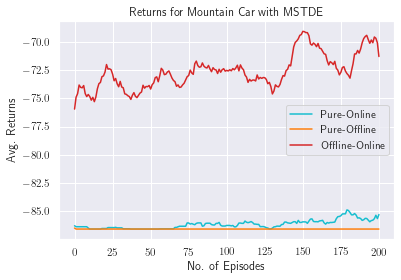

In [114]:
show_plot_for_all_three_types("Returns", exp_name, online_returns, offline_returns, offline_online_returns)

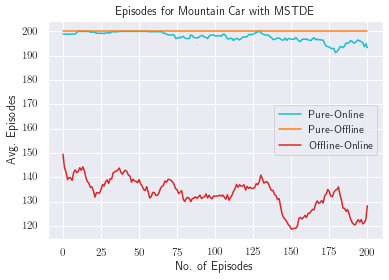

In [115]:
show_plot_for_all_three_types("Episodes", exp_name, online_eps, offline_eps, offline_online_eps)

In [126]:
# next_reward
exp_name = "MSTDE + Next Reward"
offline_exp = list_of_all_experiments[16]
online_exp = list_of_all_experiments[15]
offline_online_exp = list_of_all_experiments[17]

offline_files = dict_of_experiments_files[offline_exp]
online_files = dict_of_experiments_files[online_exp]
offline_online_files = dict_of_experiments_files[offline_online_exp]

offline_exp = offline_exp.replace("/", "").replace(".", "")
online_exp = online_exp.replace("/", "").replace(".", "")
offline_online_exp = offline_online_exp.replace("/", "").replace(".", "")

# avg returns
offline_returns = offline_files[0]
online_returns = online_files[0]
offline_online_returns = offline_online_files[1]

# avg episodes
offline_eps = offline_files[1]
online_eps = online_files[1]
offline_online_eps = offline_online_files[0]

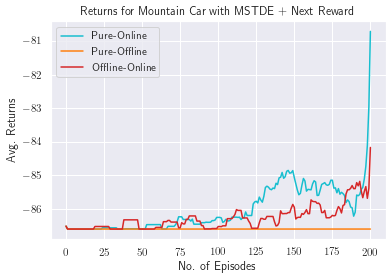

In [127]:
show_plot_for_all_three_types("Returns", exp_name, online_returns, offline_returns, offline_online_returns)

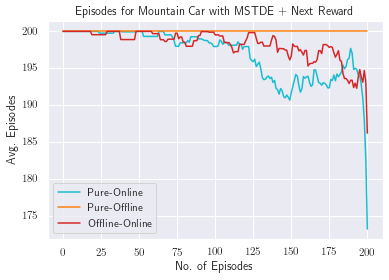

In [128]:
show_plot_for_all_three_types("Episodes", exp_name, online_eps, offline_eps, offline_online_eps)

In [136]:
# all_offline_online_experiments
mstde_next_state_offline_mstde_online = list_of_all_experiments[6]
next_state_offline_mstde_next_state_online = list_of_all_experiments[5]
next_state_offline_mstde_online = list_of_all_experiments[11]
mstde_reward_offline_mstde_online = list_of_all_experiments[18]
reward_offline_mstde_online = list_of_all_experiments[19]
reward_offline_mstde_reward_online = list_of_all_experiments[20]

mstde_next_state_offline_mstde_online_files = dict_of_experiments_files[mstde_next_state_offline_mstde_online]
next_state_offline_mstde_next_state_online_files = dict_of_experiments_files[next_state_offline_mstde_next_state_online]
next_state_offline_mstde_online_files = dict_of_experiments_files[next_state_offline_mstde_online]
mstde_reward_offline_mstde_online_files = dict_of_experiments_files[mstde_reward_offline_mstde_online]
reward_offline_mstde_online_files = dict_of_experiments_files[reward_offline_mstde_online]
reward_offline_mstde_reward_online_files = dict_of_experiments_files[reward_offline_mstde_reward_online]

mstde_next_state_offline_mstde_online_exp = mstde_next_state_offline_mstde_online.replace("/", "").replace(".", "")
next_state_offline_mstde_next_state_online_exp = next_state_offline_mstde_next_state_online.replace("/", "").replace(".", "")
next_state_offline_mstde_online_exp = next_state_offline_mstde_online.replace("/", "").replace(".", "")
mstde_reward_offline_mstde_online_exp = mstde_reward_offline_mstde_online.replace("/", "").replace(".", "")
reward_offline_mstde_online_exp = reward_offline_mstde_online.replace("/", "").replace(".", "")
reward_offline_mstde_reward_online_exp = reward_offline_mstde_reward_online.replace("/", "").replace(".", "")


# avg returns
mstde_next_state_offline_mstde_online_returns = mstde_next_state_offline_mstde_online_files[0]
next_state_offline_mstde_next_state_online_returns = next_state_offline_mstde_next_state_online_files[0]
next_state_offline_mstde_online_returns = next_state_offline_mstde_online_files[0]
mstde_reward_offline_mstde_online_returns = mstde_reward_offline_mstde_online_files[1]
reward_offline_mstde_online_returns = reward_offline_mstde_online_files[1]
reward_offline_mstde_reward_online_returns = reward_offline_mstde_reward_online_files[1]

# avg episodes
mstde_next_state_offline_mstde_online_eps = mstde_next_state_offline_mstde_online_files[1]
next_state_offline_mstde_next_state_online_eps = next_state_offline_mstde_next_state_online_files[1]
next_state_offline_mstde_online_eps = next_state_offline_mstde_online_files[1]
mstde_reward_offline_mstde_online_eps = mstde_reward_offline_mstde_online_files[0]
reward_offline_mstde_online_eps = reward_offline_mstde_online_files[0]
reward_offline_mstde_reward_online_eps = reward_offline_mstde_reward_online_files[0]


In [142]:
def show_plot_for_all_offline_online(name_of_exp, 
                                     off_on_1, 
                                     off_on_2, 
                                     off_on_3, 
                                     off_on_4,
                                     off_on_5,
                                     off_on_6):
    # read the files
    off_on_1_data = np.load(off_on_1)
    off_on_2_data = np.load(off_on_2)
    off_on_3_data = np.load(off_on_3)
    off_on_4_data = np.load(off_on_4)
    off_on_5_data = np.load(off_on_5)
    off_on_6_data = np.load(off_on_6)
    
    # compute moving avg
    w = 10
    off_on_1_avg = np.array([np.mean(off_on_1_data[i:i+w]) for i in range(0, len(off_on_1_data))])
    off_on_2_avg = np.array([np.mean(off_on_2_data[i:i+w]) for i in range(0, len(off_on_2_data))])
    off_on_3_avg = np.array([np.mean(off_on_3_data[i:i+w]) for i in range(0, len(off_on_3_data))])
    off_on_4_avg = np.array([np.mean(off_on_4_data[i:i+w]) for i in range(0, len(off_on_4_data))])
    off_on_5_avg = np.array([np.mean(off_on_5_data[i:i+w]) for i in range(0, len(off_on_5_data))])
    off_on_6_avg = np.array([np.mean(off_on_6_data[i:i+w]) for i in range(0, len(off_on_6_data))])

    # plots
    plt.plot(off_on_1_avg, color='tab:cyan', label='Off. MSTDE + Next State, On. MSTDE')
    plt.plot(off_on_2_avg, color='tab:orange', label='Off. Next State, On. MSTDE + Next State')
    plt.plot(off_on_3_avg, color='tab:red', label='Off. Next State, On. MSTDE')
    
    plt.plot(off_on_4_avg, color='tab:pink', label='Off. MSTDE + Next Reward, On. MSTDE')
    plt.plot(off_on_5_avg, color='tab:olive', label='Off. Next Reward, On. MSTDE')
    plt.plot(off_on_6_avg, color='tab:purple', label='Off. Next Reward, On. MSTDE + Next Reward')
    
    plt.legend()
    plt.title(f"Offline-Online {name_of_exp} Experiments for Mountain Car")
    plt.ylabel(f"Avg. {name_of_exp}")
    plt.xlabel("No. of Episodes")
    sns.set(rc={'text.usetex': True})
    plt.savefig("Offline-Online_" + name_of_exp + ".png", dpi=300)
    plt.show()

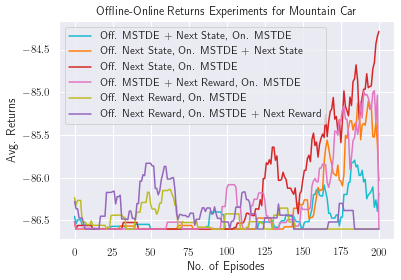

In [143]:
show_plot_for_all_offline_online("Returns",
                                 mstde_next_state_offline_mstde_online_returns,
                                 next_state_offline_mstde_next_state_online_returns,
                                 next_state_offline_mstde_online_returns,
                                 mstde_reward_offline_mstde_online_returns,
                                 reward_offline_mstde_online_returns,
                                 reward_offline_mstde_reward_online_returns)

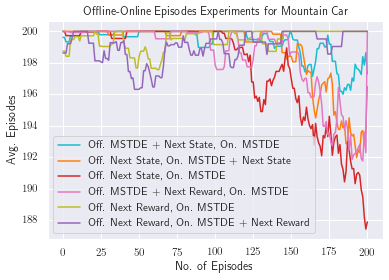

In [144]:
show_plot_for_all_offline_online("Episodes",
                                 mstde_next_state_offline_mstde_online_eps,
                                 next_state_offline_mstde_next_state_online_eps,
                                 next_state_offline_mstde_online_eps,
                                 mstde_reward_offline_mstde_online_eps,
                                 reward_offline_mstde_online_eps,
                                 reward_offline_mstde_reward_online_eps)